# Filtragem em Frequência

Esse código implementa uma filtragem no domínio da frêquencia baseada na Transformada de Fourier (FT). Feito utilizando Numpy

## Descrição

Em processamento digital de imagens, a filtragem em frequência é utilizada quando se trabalha no domínio da frequência. Utilizando a Transformada Rápida de Fourier (FFT), podemos analisar e manipular as componentes de frequência de uma imagem para alcançar objetivos como suavização, realce de bordas, ou remoção de ruídos.

A Transformada de Fourier (TF) decompõe uma imagem em suas componentes de frequência.

- **Frequências baixas:** Representam as variações lentas (informações de fundo ou regiões suaves).
- **Frequências altas:** Representam as variações rápidas (detalhes finos como bordas e texturas).

A FFT é uma implementação eficiente da Transformada Discreta de Fourier (DFT), amplamente usada para processar imagens digitais devido ao seu desempenho.

Algumas operações são mais intuitivas ou eficientes no domínio da frequência:

- **Remoção de ruídos:** Ruídos de alta frequência podem ser eliminados aplicando filtros passa-baixa.
- **Realce de bordas:** Detalhes finos podem ser destacados com filtros passa-alta.
- **Compressão:** Ao descartar certas componentes de frequência, pode-se comprimir dados sem perda perceptível de qualidade.

- **Transformada de Fourier**

    Calcula o espectro e a fase de imagens

    ```python
    def fft(imagem):
        if not isinstance(imagem, np.ndarray):
            img = imagem.convert("L")
        else:
            img = imagem

        img = np.array(imagem)
        fft = np.fft.fft2(img)
        fft = np.fft.fftshift(fft)
        return fft
    ```
- **Filtros no Domínio da Frequência**

    - Ideal - Bloqueia/preserva bruscamente todas as frequências acima do raio e preserva/bloqueia todas abaixo.
    - Butterworth - Transição suave entre as frequências bloqueadas e preservadas. O controle da suavidade é feito pelo parâmetro ordem.
    - Gaussiano - Baseado na função Gaussiana, aplicando um decaimento/aumento exponencial das frequências com a distância ao centro.

    - **Filtro Passa-Baixa**

        Serve para bloquear as altas frêquencias e preservar as baixas frêquencias, pode ser de cada um dos tipos citados. É o equivalente ao inverso do passa-alta.

    - **Filtro Passa-Alta**

        Serve para bloquear as baixas frêquencias e preservar as altas frêquencias, pode ser de cada um dos tipos citados. É o equivalente ao inverso do passa-baixa.

    - **Filtro Passa-Faixa**

        Serve para bloquear as frêquencias abaixo de um limiar 1 e acima de um limiar 2, e preservar as frêquencias dentro desses dois limiares, pode ser de cada um dos tipos citados. É o equivalente a um **passa-baixa(limiar 2) - passa-baixa(limiar 1)**.

- **Transformações no Domínio da Frêquencia**

    - **Rotação**

        No domínio espacial a rotação de uma imagem corresponde a uma rotação equivalente no espectro de frequência. Ou seja ao rotacionar a imagem em um ângulo 𝜃, as componentes de frequência também giram no mesmo ângulo 𝜃.

        ```python
        def rotacionar(imagem, angulo):
            imagem = Image.fromarray(np.array(imagem))
            imagem = imagem.rotate(angulo)
            return np.array(imagem)
        ````

    - **Translação**

        No domínio espacial a translação não altera a magnitude do espectro de frequência, mas introduz uma mudança de fase. Ou seja ao rotacionar a imagem em um ângulo 𝜃, as componentes de frequência também giram no mesmo ângulo 𝜃.

        ```python
        def transladar(imagem, dx, dy):
            imagem = Image.fromarray(np.array(imagem))
            imagem = imagem.transform(imagem.size, Image.AFFINE, (1, 0, dx, 0, 1, dy))
            return np.array(imagem)
        ````

    - **Zoom**

        No domínio espacial o aumento do tamanho da imagem (zoom in) corresponde a uma dilatação das componentes de frequência, resultando em maior espaçamento entre eles. Já a redução da imagem (zoom out) compacta as componentes de frequência, podendo causar aliasing se não for tratada adequadamente. O espectro de frequência aumenta proporcionalmente ao fator de escala.

        ```python
        def zoom(imagem, fator):
            imagem = Image.fromarray(np.array(imagem))
            imagem = imagem.resize((int(imagem.width * fator), int(imagem.height * fator)))
            return np.array(imagem)
        ````

### Código final

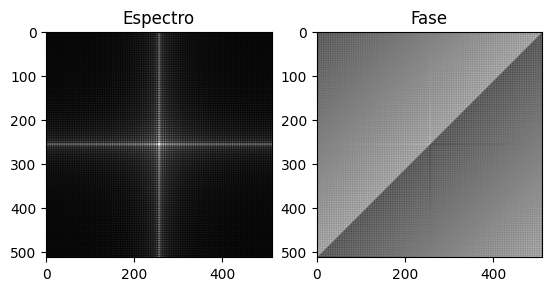

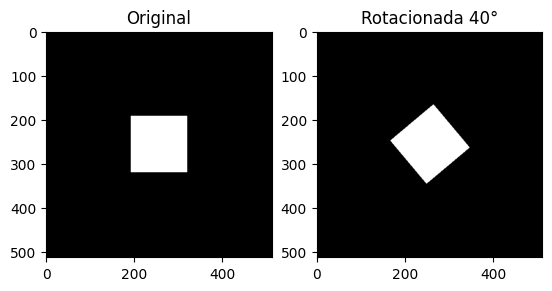

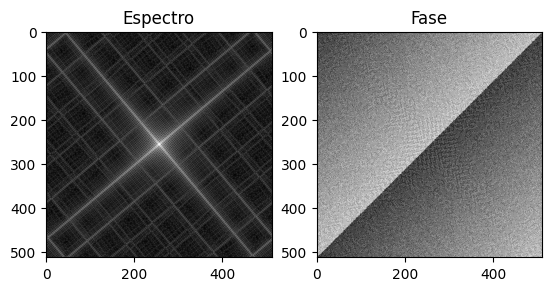

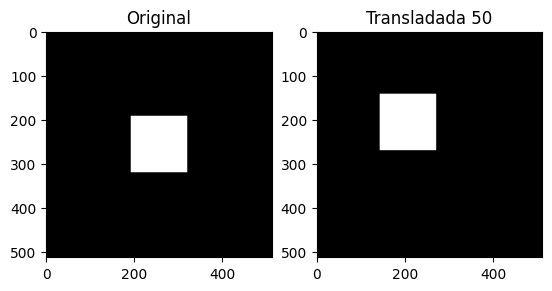

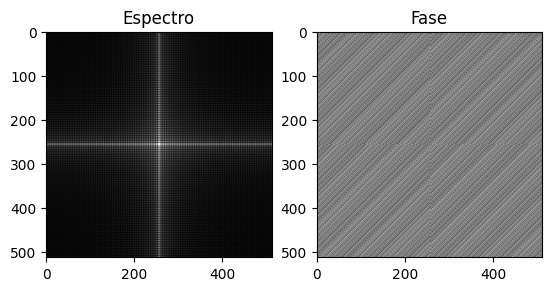

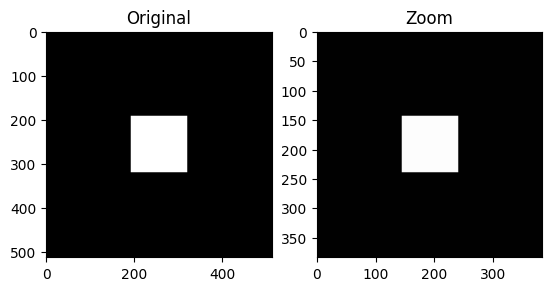

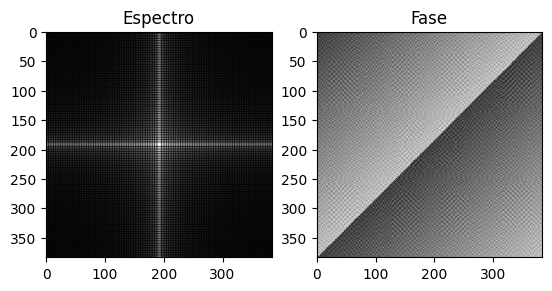

h) 
Rotação: Uma rotação no espaço resulta em uma rotação idêntica no domínio da frequência.
Translação: Um deslocamento da imagem no espaço altera apenas sua fase no domínio da frequência.
Zoom: Ampliar a imagem no espaço reduz sua transformada de Fourier.


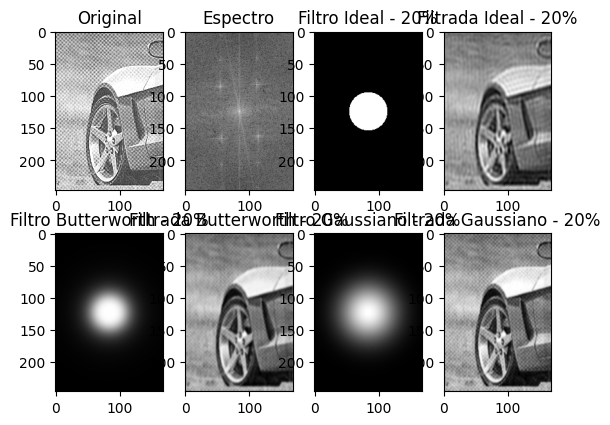

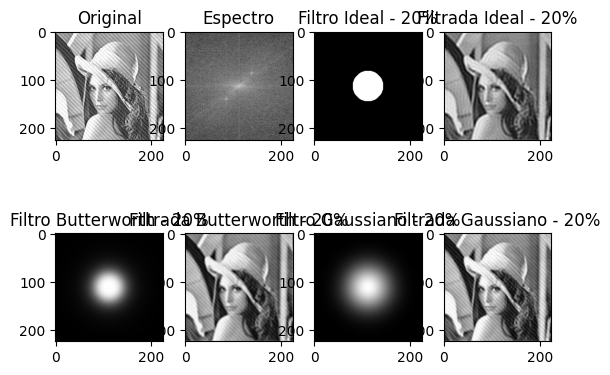

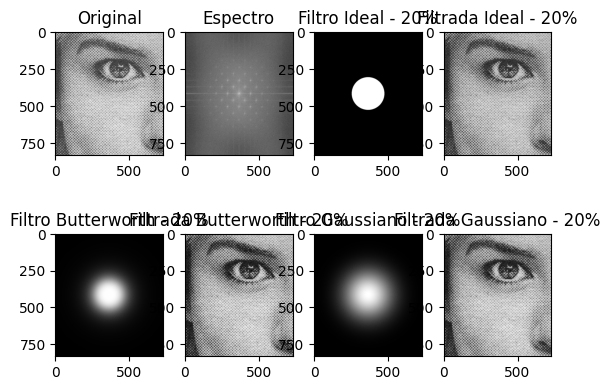

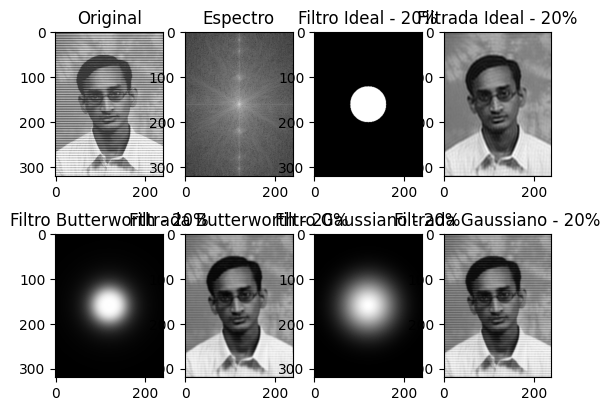

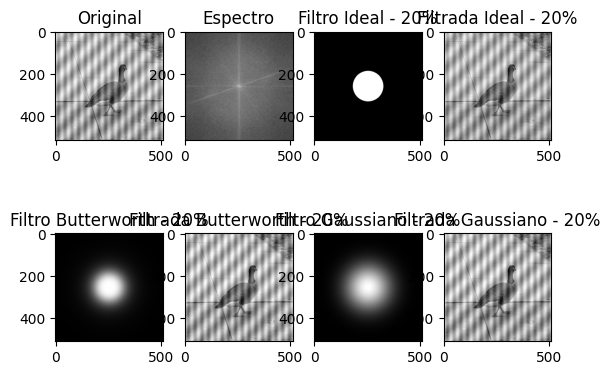

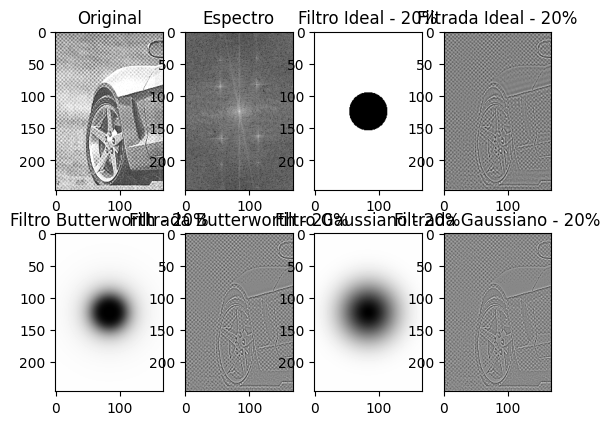

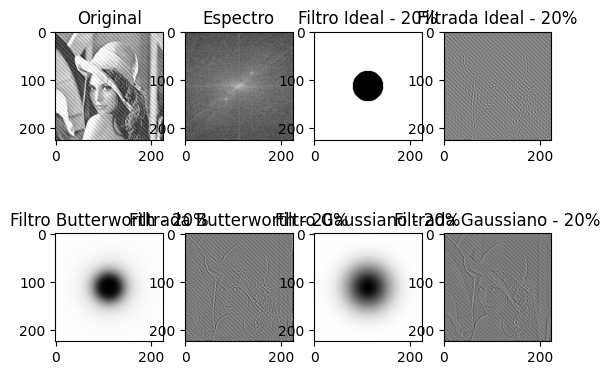

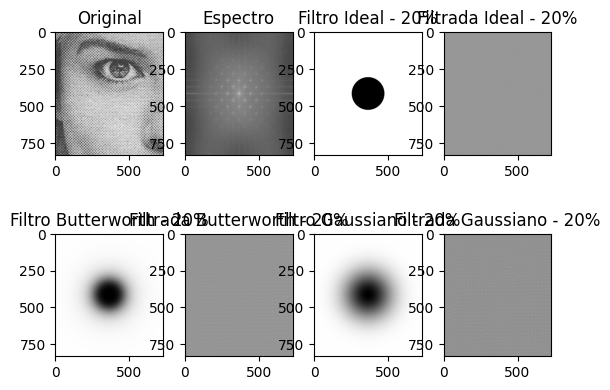

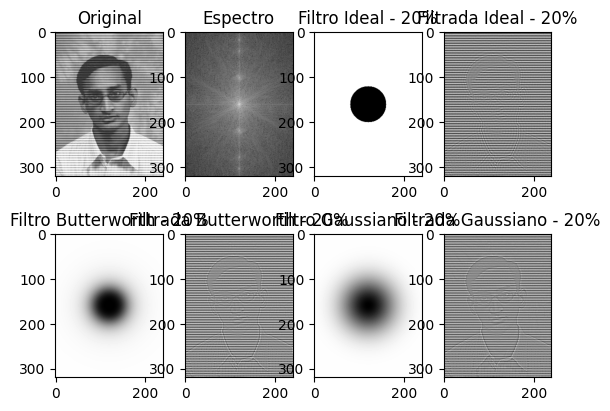

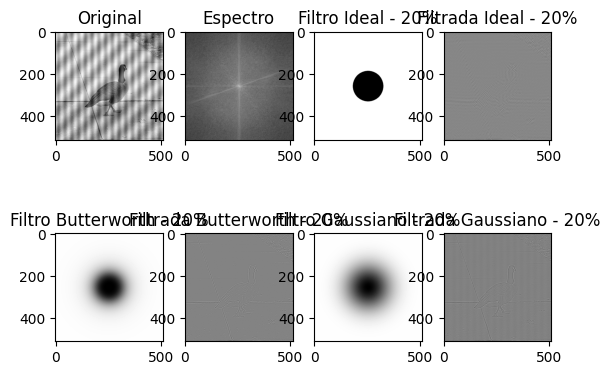

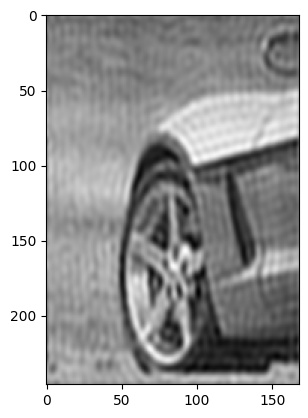

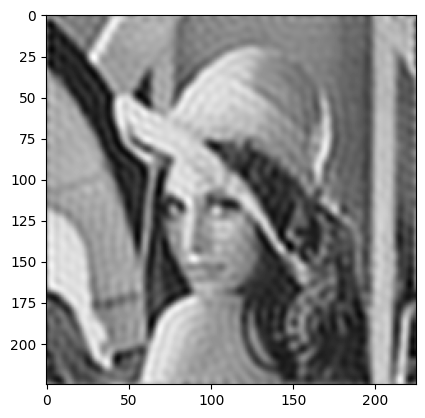

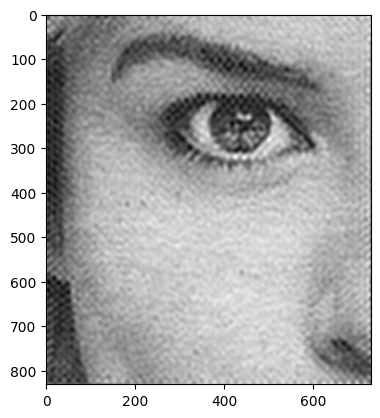

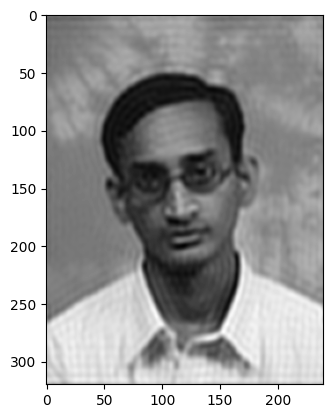

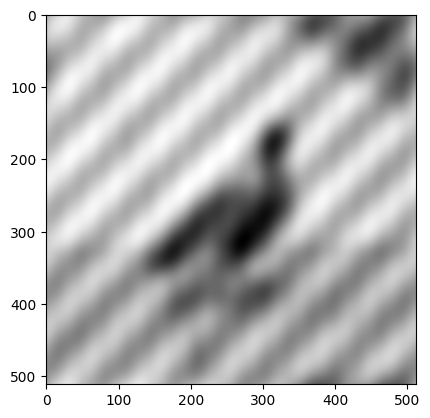

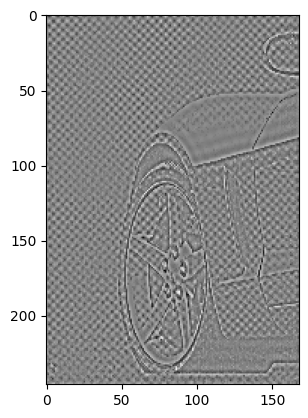

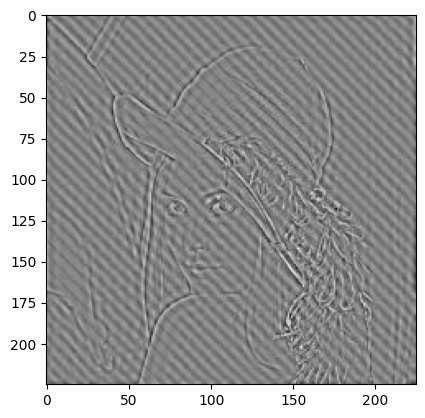

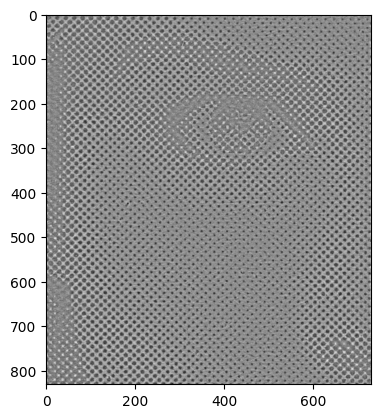

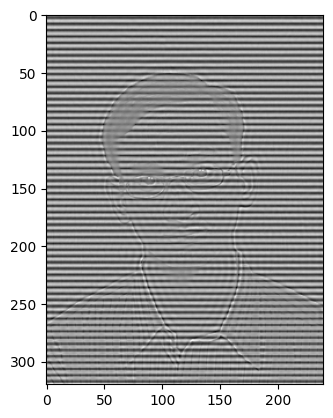

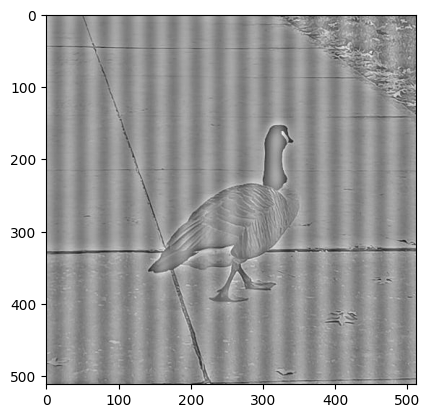

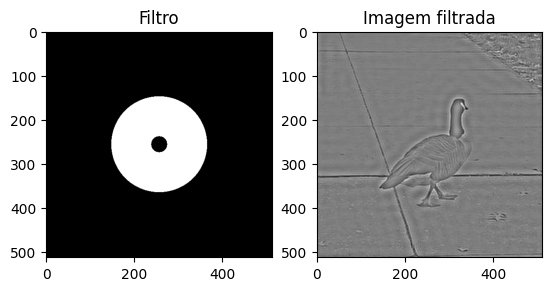

O filtro passa-faixa é um tipo de filtro que permite a passagem de frequências dentro de uma faixa específica bloqueia as frequências fora dessa faixa.
Combinação de um filtro passa-alta e um filtro passa-baixa.


In [4]:
import datetime
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def plotUm(img):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(img, cmap='gray')
    plt.show()

def plotDois(imgs):
    for i in range(len(imgs)):
        fig, ax = plt.subplots(nrows=2, ncols=4)
        ax[0][0].imshow(imgs[i], cmap='gray')
        ax[0][0].set_title("Original")

        ax[0][1].imshow(fftImage(imgs[i]), cmap='gray')
        ax[0][1].set_title("Espectro")

        ax[0][2].imshow(imgFiltro(filtroPassaBaixa(20, imgs[i].shape, tipo="Ideal", porcentagem=True)), cmap='gray')
        ax[0][2].set_title("Filtro Ideal - 20%")

        ax[0][3].imshow(Filtrar(imgs[i], filtroPassaBaixa(20, imgs[i].shape, tipo="Ideal", porcentagem=True)), cmap='gray')
        ax[0][3].set_title("Filtrada Ideal - 20%")

        ax[1][0].imshow(imgFiltro(filtroPassaBaixa(20, imgs[i].shape, tipo="Butterworth", porcentagem=True)), cmap='gray')
        ax[1][0].set_title("Filtro Butterworth - 20%")

        ax[1][1].imshow(Filtrar(imgs[i], filtroPassaBaixa(20, imgs[i].shape, tipo="Butterworth", porcentagem=True)), cmap='gray')
        ax[1][1].set_title("Filtrada Butterworth - 20%")

        ax[1][2].imshow(imgFiltro(filtroPassaBaixa(20, imgs[i].shape, tipo="Gaussiano", porcentagem=True)), cmap='gray')
        ax[1][2].set_title("Filtro Gaussiano - 20%")

        ax[1][3].imshow(Filtrar(imgs[i], filtroPassaBaixa(20, imgs[i].shape, tipo="Gaussiano", porcentagem=True)), cmap='gray')
        ax[1][3].set_title("Filtrada Gaussiano - 20%")
        plt.show()

def plotTres(imgs):
    for i in range(len(imgs)):
        fig, ax = plt.subplots(nrows=2, ncols=4)
        ax[0][0].imshow(imgs[i], cmap='gray')
        ax[0][0].set_title("Original")

        ax[0][1].imshow(fftImage(imgs[i]), cmap='gray')
        ax[0][1].set_title("Espectro")

        ax[0][2].imshow(imgFiltro(filtroPassaAlta(20, imgs[i].shape, tipo="Ideal", porcentagem=True)), cmap='gray')
        ax[0][2].set_title("Filtro Ideal - 20%")

        ax[0][3].imshow(Filtrar(imgs[i], filtroPassaAlta(20, imgs[i].shape, tipo="Ideal", porcentagem=True)), cmap='gray')
        ax[0][3].set_title("Filtrada Ideal - 20%")

        ax[1][0].imshow(imgFiltro(filtroPassaAlta(20, imgs[i].shape, tipo="Butterworth", porcentagem=True)), cmap='gray')
        ax[1][0].set_title("Filtro Butterworth - 20%")

        ax[1][1].imshow(Filtrar(imgs[i], filtroPassaAlta(20, imgs[i].shape, tipo="Butterworth", porcentagem=True)), cmap='gray')
        ax[1][1].set_title("Filtrada Butterworth - 20%")

        ax[1][2].imshow(imgFiltro(filtroPassaAlta(20, imgs[i].shape, tipo="Gaussiano", porcentagem=True)), cmap='gray')
        ax[1][2].set_title("Filtro Gaussiano - 20%")

        ax[1][3].imshow(Filtrar(imgs[i], filtroPassaAlta(20, imgs[i].shape, tipo="Gaussiano", porcentagem=True)), cmap='gray')
        ax[1][3].set_title("Filtrada Gaussiano - 20%")
        plt.show()


def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def baseImage(imgSize, blackSize, percentage = False):
    img = np.zeros((imgSize, imgSize))
    center = imgSize // 2
    if percentage:
        blackSize = int(imgSize * (blackSize / 100))
    img[center - blackSize // 2:center + blackSize // 2, center - blackSize // 2:center + blackSize // 2] = 1
    return img

def fft(imagem):
    
    if not isinstance(imagem, np.ndarray):
        img = imagem.convert("L")
    else:
        img = imagem
    img = np.array(imagem)
    fft = np.fft.fft2(img)
    fft = np.fft.fftshift(fft)
    return fft

def fftImage(imagem):
    transf = fft(imagem)
    transf = np.log(1 + np.abs(transf))
    transf = 255 * (transf - np.min(transf)) / (np.max(transf) - np.min(transf))

    return Image.fromarray(np.uint8(transf))

def inverse_fft(fft):
    ifft = np.fft.ifftshift(fft)
    ifft = np.fft.ifft2(ifft)
    return np.real(ifft)

def inverse_fftImage(fft):
    ifft = inverse_fft(fft)
    ifft = 255 * (ifft - np.min(ifft)) / (np.max(ifft) - np.min(ifft))

    return Image.fromarray(np.uint8(ifft))

def espectro(imagem):
    img = np.array(imagem)
    return np.fft.fftshift(np.fft.fft2(img))

def fase(imagem):
    img = np.array(imagem)
    return np.angle(np.fft.fftshift(np.fft.fft2(img)))

def plotFFT(imagem):
    e = espectro(imagem)
    f = fase(imagem)
    plot(np.log(1 + np.abs(e)), f, "Espectro", "Fase")

def rotacionar(imagem, angulo):
    imagem = Image.fromarray(np.array(imagem))
    imagem = imagem.rotate(angulo)
    return np.array(imagem)

def transladar(imagem, dx, dy):
    imagem = Image.fromarray(np.array(imagem))
    imagem = imagem.transform(imagem.size, Image.AFFINE, (1, 0, dx, 0, 1, dy))
    return np.array(imagem)

def zoom(imagem, fator):
    imagem = Image.fromarray(np.array(imagem))
    imagem = imagem.resize((int(imagem.width * fator), int(imagem.height * fator)))
    return np.array(imagem)

def h():
    print("h) ")
    print("Rotação: Uma rotação no espaço resulta em uma rotação idêntica no domínio da frequência.")
    print("Translação: Um deslocamento da imagem no espaço altera apenas sua fase no domínio da frequência.")
    print("Zoom: Ampliar a imagem no espaço reduz sua transformada de Fourier.")

import numpy as np

def filtroPassaBaixa(raio, imgSize, tipo="Ideal", ordem=2, porcentagem=False):
    altura, largura = imgSize
    filtro = np.zeros((altura, largura))
    
    centro_x, centro_y = altura // 2, largura // 2
    
    if porcentagem:
        diagonal = np.sqrt(altura**2 + largura**2)
        raio = (raio / 100) * (diagonal / 2)

    x, y = np.meshgrid(np.arange(largura), np.arange(altura))
    dist = np.sqrt((x - centro_y)**2 + (y - centro_x)**2)
    
    match tipo:
        case "Ideal":
            filtro[dist <= raio] = 1
        case "Butterworth":
            filtro = 1 / (1 + (dist / raio)**(2 * ordem))
        case "Gaussiano":
            filtro = np.exp(-(dist**2) / (2 * raio**2))
        case _:
            raise ValueError("Tipo de filtro inválido")
    
    return filtro

def filtroPassaAlta(raio, imgSize, tipo="Ideal", ordem=2, porcentagem=False):
    return 1 - filtroPassaBaixa(raio, imgSize, tipo, ordem, porcentagem)

def filtroPassaFaixa(raio1, raio2, imgSize, tipo="Ideal", ordem=2, porcentagem=False):
    return filtroPassaBaixa(raio2, imgSize, tipo, ordem, porcentagem) - filtroPassaBaixa(raio1, imgSize, tipo, ordem, porcentagem)

def Filtrar(imagem, filtro):
    filtro = fft(imagem) * filtro
    return inverse_fft(filtro)

def imgFiltro(filtro):
    filtro = 255 * (filtro - np.min(filtro)) / (np.max(filtro) - np.min(filtro))
    return np.uint8(filtro)

def loadFourierImgs():
    path = 'imgs/fourier/'
    imgs = []
    imgs.append(np.array(Image.open(path + 'car.tif').convert('L')))
    imgs.append(np.array(Image.open(path + 'len_periodic_noise.png').convert('L')))
    imgs.append(np.array(Image.open(path + 'newspaper_shot_woman.tif').convert('L')))
    imgs.append(np.array(Image.open(path + 'periodic_noise.png').convert('L')))
    imgs.append(np.array(Image.open(path + 'pnois2.jpg').convert('L')))
    return imgs

def ExUm():

    imagem = baseImage(512, 25, True)
    plotFFT(imagem)
    rotacionada = rotacionar(imagem, 40)
    plot(imagem, rotacionada, "Original", "Rotacionada 40°")
    plotFFT(rotacionada)
    transladada = transladar(imagem, 50, 50)
    plot(imagem, transladada, "Original", "Transladada 50")
    plotFFT(transladada)
    zoomIMG = zoom(imagem, 0.75)
    plot(imagem, zoomIMG, "Original", "Zoom")
    plotFFT(zoomIMG)
    h()

def ExDois():
    imgs = loadFourierImgs()
    plotDois(imgs)

def ExTres():
    imgs = loadFourierImgs()
    plotTres(imgs)

def ExQuatro():
    imgs = loadFourierImgs()
    imgs[0] = Filtrar(imgs[0], filtroPassaBaixa(20, imgs[0].shape, tipo="Ideal", porcentagem=True))
    imgs[1] = Filtrar(imgs[1], filtroPassaBaixa(20, imgs[1].shape, tipo="Ideal", porcentagem=True)) 
    imgs[2] = Filtrar(imgs[2], filtroPassaBaixa(10, imgs[2].shape, tipo="Ideal", porcentagem=True))
    imgs[3] = Filtrar(imgs[3], filtroPassaBaixa(20, imgs[3].shape, tipo="Ideal", porcentagem=True))
    imgs[4] = Filtrar(imgs[4], filtroPassaBaixa(2, imgs[4].shape, tipo="Butterworth", porcentagem=True))
    for img in imgs:
        plotUm(img)

def ExCinco():
    imgs = loadFourierImgs()
    imgs[0] = Filtrar(imgs[0], filtroPassaAlta(20, imgs[0].shape, tipo="Ideal", porcentagem=True))
    imgs[1] = Filtrar(imgs[1], filtroPassaAlta(20, imgs[1].shape, tipo="Ideal", porcentagem=True)) 
    imgs[2] = Filtrar(imgs[2], filtroPassaAlta(10, imgs[2].shape, tipo="Ideal", porcentagem=True))
    imgs[3] = Filtrar(imgs[3], filtroPassaAlta(20, imgs[3].shape, tipo="Ideal", porcentagem=True))
    imgs[4] = Filtrar(imgs[4], filtroPassaAlta(4, imgs[4].shape, tipo="Butterworth", porcentagem=True))
    for img in imgs:
        plotUm(img)
        

def ExSeis():
    imgs = loadFourierImgs()
    pos = 4
    img = imgs[pos]
    filtro = filtroPassaFaixa(5, 30, img.shape, tipo="Ideal", porcentagem=True)
    filtroIMG = imgFiltro(filtro)
    img = Filtrar(img, filtro)
    plot(filtroIMG, img, "Filtro", "Imagem filtrada")
    print("O filtro passa-faixa é um tipo de filtro que permite a passagem de frequências dentro de uma faixa específica bloqueia as frequências fora dessa faixa.")
    print("Combinação de um filtro passa-alta e um filtro passa-baixa.")

def main():

    ExUm()
    # h) 
    # Rotação: Uma rotação no espaço resulta em uma rotação idêntica no domínio da frequência.
    # Translação: Um deslocamento da imagem no espaço altera apenas sua fase no domínio da frequência.
    # Zoom: Ampliar a imagem no espaço reduz sua transformada de Fourier.
    ExDois()
    ExTres()
    ExQuatro()
    ExCinco()
    ExSeis()
    # O filtro passa-faixa é um tipo de filtro que permite a passagem de frequências dentro de uma faixa específica bloqueia as frequências fora dessa faixa.
    # Combinação de um filtro passa-alta e um filtro passa-baixa.
    
if __name__ == "__main__":
    main()
